In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#!pip install --upgrade plotly

In [3]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 

In [68]:
df = pd.read_csv("/content/gdrive/MyDrive/owid-covid-data.csv")
check = pd.read_csv("/content/gdrive/MyDrive/owid-covid-data.csv")

In [6]:
df["date"] = pd.to_datetime(df["date"])

In [7]:
df["date"].min()

Timestamp('2020-01-01 00:00:00')

In [8]:
df["date"].max()

Timestamp('2021-06-04 00:00:00')

In [9]:
df = df[df["date"] > "2020-04-30"]

In [10]:
df["date"].min()

Timestamp('2020-05-01 00:00:00')

In [11]:
df["date"].max()

Timestamp('2021-06-04 00:00:00')

In [12]:
dataset_India = df[df["location"] == "India"]          #41 NA death_daily
dataset_USA = df[df["location"] == "United States"]    #38 NA death_daily
dataset_UK = df[df["location"] == "United Kingdom"]    #35 NA death_daily
dataset_Canada = df[df["location"] == "Canada"]        #43 NA death_daily
dataset_Italy = df[df["location"] == "Italy"]          #21 NA death_daily

In [14]:
features = ["date", "location", "new_deaths", "population", "total_cases", "new_cases"]

In [15]:
dataset_India = dataset_India[features]
dataset_USA = dataset_USA[features]
dataset_UK = dataset_UK[features]
dataset_Canada = dataset_Canada[features]
dataset_Italy = dataset_Italy[features]

In [16]:
dataset_India.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 38760 to 39159
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         400 non-null    datetime64[ns]
 1   location     400 non-null    object        
 2   new_deaths   400 non-null    float64       
 3   population   400 non-null    float64       
 4   total_cases  400 non-null    float64       
 5   new_cases    400 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 21.9+ KB


In [17]:
dataset_Italy.isna().sum()

date           0
location       0
new_deaths     0
population     0
total_cases    0
new_cases      0
dtype: int64

In [18]:
dataset_India["date"].max() == dataset_USA["date"].max() == dataset_UK["date"].max() == dataset_Canada["date"].max() == dataset_Italy["date"].max() 

True

In [19]:
dataset_India["date"].min() == dataset_USA["date"].min() == dataset_UK["date"].min() == dataset_Canada["date"].min() == dataset_Italy["date"].min() 

True

In [20]:
dataset_India.head()

,date,location,new_deaths,population,total_cases,new_cases
38760,2020-05-01,India,69.0,1.380004e+09,37257.0,2394.0
38761,2020-05-02,India,100.0,1.380004e+09,39699.0,2442.0
38762,2020-05-03,India,68.0,1.380004e+09,42505.0,2806.0
38763,2020-05-04,India,175.0,1.380004e+09,46437.0,3932.0
38764,2020-05-05,India,127.0,1.380004e+09,49400.0,2963.0


In [21]:
dataset_India["Mortality_Rate"] = " "
dataset_Canada["Mortality_Rate"] = " "
dataset_UK["Mortality_Rate"] = " "
dataset_USA["Mortality_Rate"] = " "
dataset_Italy["Mortality_Rate"] = " "

In [22]:
dataset_India["Mortality_Rate"] = dataset_India["new_deaths"]/dataset_India["population"]
dataset_USA["Mortality_Rate"] = dataset_USA["new_deaths"]/dataset_USA["population"]
dataset_UK["Mortality_Rate"] = dataset_UK["new_deaths"]/dataset_UK["population"]
dataset_Canada["Mortality_Rate"] = dataset_Canada["new_deaths"]/dataset_Canada["population"]
dataset_Italy["Mortality_Rate"] = dataset_Italy["new_deaths"]/dataset_Italy["population"]

In [23]:
dataset_Italy.head()

,date,location,new_deaths,population,total_cases,new_cases,Mortality_Rate
42208,2020-05-01,Italy,269.0,60461828.0,207428.0,1965.0,0.000004
42209,2020-05-02,Italy,474.0,60461828.0,209328.0,1900.0,0.000008
42210,2020-05-03,Italy,174.0,60461828.0,210717.0,1389.0,0.000003
42211,2020-05-04,Italy,195.0,60461828.0,211938.0,1221.0,0.000003
42212,2020-05-05,Italy,236.0,60461828.0,213013.0,1075.0,0.000004


In [24]:
dataset_Canada.head()

,date,location,new_deaths,population,total_cases,new_cases,Mortality_Rate
15216,2020-05-01,Canada,202.0,37742157.0,56343.0,1886.0,0.000005
15217,2020-05-02,Canada,148.0,37742157.0,57926.0,1583.0,0.000004
15218,2020-05-03,Canada,140.0,37742157.0,60504.0,2578.0,0.000004
15219,2020-05-04,Canada,242.0,37742157.0,61957.0,1453.0,0.000006
15220,2020-05-05,Canada,170.0,37742157.0,63215.0,1258.0,0.000005


In [25]:
dataset_USA.head()

,date,location,new_deaths,population,total_cases,new_cases,Mortality_Rate
88748,2020-05-01,United States,1914.0,331002647.0,1116012.0,34907.0,0.000006
88749,2020-05-02,United States,1730.0,331002647.0,1143360.0,27348.0,0.000005
88750,2020-05-03,United States,1197.0,331002647.0,1167681.0,24321.0,0.000004
88751,2020-05-04,United States,1389.0,331002647.0,1191749.0,24068.0,0.000004
88752,2020-05-05,United States,2216.0,331002647.0,1216277.0,24528.0,0.000007


In [26]:
dataset_UK.head()

,date,location,new_deaths,population,total_cases,new_cases,Mortality_Rate
88248,2020-05-01,United Kingdom,700.0,67886004.0,183501.0,4730.0,0.000010
88249,2020-05-02,United Kingdom,585.0,67886004.0,186731.0,3230.0,0.000009
88250,2020-05-03,United Kingdom,253.0,67886004.0,189708.0,2977.0,0.000004
88251,2020-05-04,United Kingdom,273.0,67886004.0,193091.0,3383.0,0.000004
88252,2020-05-05,United Kingdom,725.0,67886004.0,196780.0,3689.0,0.000011


In [27]:
dataset_India.head()

,date,location,new_deaths,population,total_cases,new_cases,Mortality_Rate
38760,2020-05-01,India,69.0,1.380004e+09,37257.0,2394.0,4.999984e-08
38761,2020-05-02,India,100.0,1.380004e+09,39699.0,2442.0,7.246354e-08
38762,2020-05-03,India,68.0,1.380004e+09,42505.0,2806.0,4.927521e-08
38763,2020-05-04,India,175.0,1.380004e+09,46437.0,3932.0,1.268112e-07
38764,2020-05-05,India,127.0,1.380004e+09,49400.0,2963.0,9.202869e-08


In [28]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [29]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
67,AFG,Asia,Afghanistan,2020-05-01,2291.0,164.0,137.143,68.0,4.0,3.571,58.852,4.213,3.523,1.747,0.103,0.092,1.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.26,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
68,AFG,Asia,Afghanistan,2020-05-02,2470.0,179.0,143.714,72.0,4.0,3.571,63.450,4.598,3.692,1.850,0.103,0.092,1.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.26,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
69,AFG,Asia,Afghanistan,2020-05-03,2705.0,235.0,167.571,85.0,13.0,4.714,69.487,6.037,4.305,2.183,0.334,0.121,1.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.26,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
70,AFG,Asia,Afghanistan,2020-05-04,2895.0,190.0,170.143,90.0,5.0,4.571,74.367,4.881,4.371,2.312,0.128,0.117,1.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.26,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
71,AFG,Asia,Afghanistan,2020-05-05,3225.0,330.0,199.286,95.0,5.0,5.143,82.845,8.477,5.119,2.440,0.128,0.132,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.26,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [30]:
dataset  = df[df["location"] == "India"]

In [31]:
dataset.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
39155,IND,Asia,India,2021-05-31,28175044.0,127510.0,175167.143,331895.0,2795.0,3523.429,20416.634,92.398,126.932,240.503,2.025,2.553,0.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1683135.0,344866883.0,249.903,1.220,2047260.0,1.484,0.086,11.7,samples tested,210449895.0,167191085.0,43258810.0,1784772.0,2326312.0,15.25,12.12,3.13,1686.0,81.94,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39156,IND,Asia,India,2021-06-01,28307832.0,132788.0,164291.000,335102.0,3207.0,3387.714,20512.857,96.223,119.051,242.827,2.324,2.455,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925374.0,346792257.0,251.298,1.395,2028297.0,1.470,0.081,12.3,samples tested,213135738.0,169585180.0,43550558.0,2685843.0,2518423.0,15.44,12.29,3.16,1825.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39157,IND,Asia,India,2021-06-02,28441986.0,134154.0,153270.429,337989.0,2887.0,3250.571,20610.069,97.213,111.065,244.919,2.092,2.355,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3265073.0,350057330.0,253.664,2.366,2177976.0,1.578,0.070,14.2,samples tested,215678166.0,171866824.0,43811342.0,2542428.0,2464650.0,15.63,12.45,3.17,1786.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39158,IND,Asia,India,2021-06-03,28574350.0,132364.0,145556.143,340702.0,2713.0,3115.286,20705.985,95.916,105.475,246.885,1.966,2.257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3725318.0,353782648.0,256.363,2.699,2401899.0,1.741,0.061,16.5,samples tested,218344384.0,174296917.0,44047467.0,2666218.0,2448745.0,15.82,12.63,3.19,1774.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
39159,IND,Asia,India,2021-06-04,28694879.0,120529.0,137947.429,344082.0,3380.0,3081.429,20793.325,87.340,99.962,249.334,2.449,2.233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3651198.0,357433846.0,259.009,2.646,2627712.0,1.904,NaN,NaN,samples tested,223607768.0,179172948.0,44434820.0,5263384.0,2920138.0,16.20,12.98,3.22,2116.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


In [32]:
#the hover value is the Total Cases

fig = px.area(dataset_India, x = "date", y = "new_deaths", height = 600, width = 700, title = "Deaths Over Time (India)", color_discrete_sequence = [rec, dth], hover_data = ["total_cases", "Mortality_Rate"])
#fig.update_layout(xaxis_rangeslider_visible = True)
fig.show()

In [33]:
#the hover value is the Total Cases

fig = px.area(dataset_USA, x = "date", y = "new_deaths", height = 600, width = 700, title = "Deaths Over Time (USA)", color_discrete_sequence = [rec, dth], hover_data = ["total_cases", "Mortality_Rate"])#
#fig.update_layout(xaxis_rangeslider_visible = True)
fig.show()

In [34]:
#the hover value is the Total Cases

fig = px.area(dataset_Canada, x = "date", y = "new_deaths", height = 600, width = 700, title = "Deaths Over Time (Canada)", color_discrete_sequence = [rec, dth], hover_data = ["total_cases", "Mortality_Rate"])#
#fig.update_layout(xaxis_rangeslider_visible = True)
fig.show()

In [35]:
#the hover value is the Total Cases

fig = px.area(dataset_Italy, x = "date", y = "new_deaths", height = 600, width = 700, title = "Deaths Over Time (Italy)", color_discrete_sequence = [rec, dth], hover_data = ["total_cases", "Mortality_Rate"])
#fig.update_layout(xaxis_rangeslider_visible = True)
fig.show()

In [36]:
#the hover value is the Total Cases

fig = px.area(dataset_UK, x = "date", y = "new_deaths", height = 600, width = 700, title = "Deaths Over Time (UK)", color_discrete_sequence = [rec, dth], hover_data = ["total_cases", "Mortality_Rate"])#
#fig.update_layout(xaxis_rangeslider_visible = True)
fig.show()

In [37]:
dataset_UK[dataset_UK["date"] == "2020-06-17"]

,date,location,new_deaths,population,total_cases,new_cases,Mortality_Rate
88295,2020-06-17,United Kingdom,110.0,67886004.0,275970.0,999.0,0.000002


In [38]:
#the hover value is the Total Cases

fig = px.area(dataset_India, x = "date", y = "Mortality_Rate", height = 600, width = 700, title = "Mortality Rate Over Time (India)", color_discrete_sequence = [rec, dth], )#
#fig.update_layout(xaxis_rangeslider_visible = True)
fig.show()

In [39]:
#case fatility rate = confirmed deaths / confirmed cases

In [40]:
#the hover value is the Total Cases

fig = px.area(dataset_India, x = "date", y = "Mortality_Rate", height = 600, width = 700, title = "Mortality Rate Over Time (India)", color_discrete_sequence = [rec, dth], hover_data = ["total_cases", "new_deaths"])
#fig.update_layout(xaxis_rangeslider_visible = True)
fig.show()

In [41]:
#the hover value is the Total Cases

fig = px.area(dataset_UK, x = "date", y = "Mortality_Rate", height = 600, width = 700, title = "Mortality Rate Over Time (UK)", color_discrete_sequence = [rec, dth], hover_data = ["total_cases", "new_deaths"])
#fig.update_layout(xaxis_rangeslider_visible = True)
fig.show()

In [42]:
#the hover value is the Total Cases

fig = px.area(dataset_USA, x = "date", y = "Mortality_Rate", height = 600, width = 700, title = "Mortality Rate Over Time (USA)", color_discrete_sequence = [rec, dth], hover_data = ["total_cases", "new_deaths"])
#fig.update_layout(xaxis_rangeslider_visible = True)
fig.show()

In [43]:
#the hover value is the Total Cases

fig = px.area(dataset_Canada, x = "date", y = "Mortality_Rate", height = 600, width = 700, title = "Mortality Rate Over Time (Canada)", color_discrete_sequence = [rec, dth], hover_data = ["total_cases", "new_deaths"])
#fig.update_layout(xaxis_rangeslider_visible = True)
fig.show()

In [44]:
#the hover value is the Total Cases

fig = px.area(dataset_Italy, x = "date", y = "Mortality_Rate", height = 600, width = 700, title = "Mortality Rate Over Time (Italy)", color_discrete_sequence = [rec, dth], hover_data = ["total_cases", "new_deaths"])
#fig.update_layout(xaxis_rangeslider_visible = True)
fig.show()

In [45]:
px.line(dataset_India,  dataset_India["date"], dataset_India["Mortality_Rate"], title = "Mortality Rate (India)")#, linewidth = 3)

In [46]:
px.line(dataset_USA,  dataset_USA["date"], dataset_USA["Mortality_Rate"], title = "Mortality Rate (USA)")

In [47]:
px.line(dataset_UK,  dataset_UK["date"], dataset_UK["Mortality_Rate"], title = "Mortality Rate (UK)")

In [48]:
px.line(dataset_Canada,  dataset_Canada["date"], dataset_Canada["Mortality_Rate"], title = "Mortality Rate (Canada)")

In [49]:
px.line(dataset_Italy,  dataset_Italy["date"], dataset_Italy["Mortality_Rate"], title = "Mortality Rate (Italy)")

In [50]:
cc = [dataset_Canada, dataset_India, dataset_Italy, dataset_UK, dataset_USA]
dataset = pd.concat(cc)

In [51]:
len(dataset)

2000

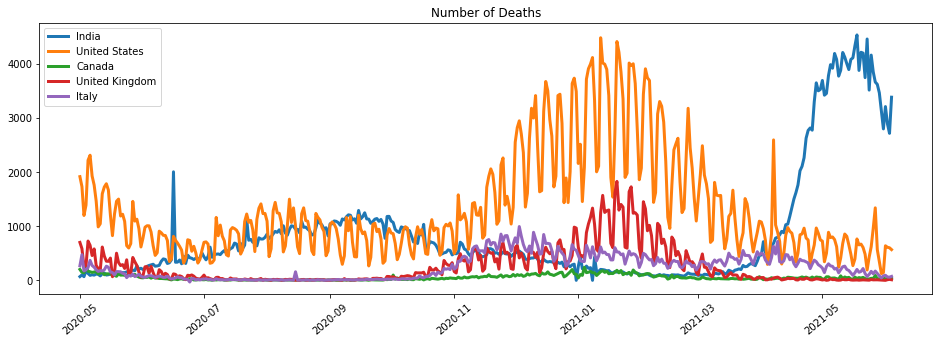

In [52]:
def pltCountry_fatalities(Fatalities, *argv):
  f, ax = plt.subplots(figsize = (16, 5))
  labels = argv
  #print(labels)     #('China',)
  for i in argv:
    #print(i)
    #print(i)       #China
    country = dataset.loc[(dataset["location"] == i)]
    #px.line(country, country["date"], country["new_deaths"], title =  "Number of Deaths (Canada)")

    plt.plot(country["date"], country["new_deaths"], linewidth = 3)
    plt.xticks(rotation = 40)
    plt.legend(labels)
    #px.legend(labels)
    ax.set(title = "Number of Deaths")

pltCountry_fatalities("new_deaths", "India","United States", "Canada", "United Kingdom", "Italy")

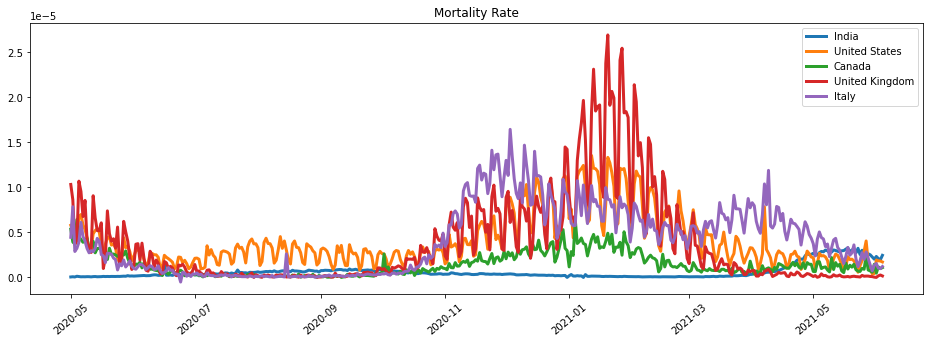

In [53]:
def pltCountry_MortalityRate(Fatalities, *argv):
  f, ax = plt.subplots(figsize = (16, 5))
  labels = argv
  #print(labels)     #('China',)
  for i in argv:
    #print(i)       #China
    country = dataset.loc[(dataset["location"] == i)]
    plt.plot(country["date"], country["Mortality_Rate"], linewidth = 3)
    plt.xticks(rotation = 40)
    plt.legend(labels)
    ax.set(title = "Mortality Rate")

pltCountry_MortalityRate("Mortality_Rate", "India","United States", "Canada", "United Kingdom", "Italy")

In [60]:
 print("OK")

OK


In [62]:
fig = px.line(dataset,  dataset["date"], dataset["Mortality_Rate"], title = "Mortality Rate (5 countries)", color = dataset["location"], hover_data = ["new_deaths", "population", "total_cases", "new_cases"])

In [63]:
px.line(dataset_India,  dataset_India["date"], dataset_India["Mortality_Rate"], title = "Mortality Rate (India)", hover_data = ["new_deaths", "population", "total_cases", "new_cases"], color = )

In [66]:
#India lockdown ----> 25 March to 31 May'2020

In [70]:
dataset_India2 = df[df["location"] == "India"]

In [73]:
dataset_India2.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
38668,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
38669,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
38670,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
38671,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
38672,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


In [74]:
dataset_India2 = dataset_India2[features]

In [75]:
dataset_India2["date"].min()

'2020-01-30'

In [86]:
fig = px.line(dataset,  dataset["date"], dataset["Mortality_Rate"], title = "Mortality Rate (5 countries)", color = dataset["location"]) #hover_data = ["new_deaths", "population", "total_cases", "new_cases"])
fig.update_traces(mode = "markers + lines", hovertemplate = None)
fig.update_layout(hovermode = "x unified")
fig.show()

In [87]:
fig = px.line(dataset,  dataset["date"], dataset["new_deaths"], title = "Daily Deaths (5 countries)", color = dataset["location"]) #hover_data = ["new_deaths", "population", "total_cases", "new_cases"])
fig.update_traces(mode = "markers + lines", hovertemplate = None)
fig.update_layout(hovermode = "x unified")
fig.show()